In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv("KoreaTravel.csv")

In [51]:
data.head(10)

,ID,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
0,22020520011_1229732,4,1,1,100000.0,1,100000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,1,0
1,11090711981_1129310,3,1,1,250000.0,1,250000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
2,2503073057A_1070957,3,1,0,50001.0,3,16667.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0,0
3,26030550451_1334180,3,1,1,120000.0,1,120000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
4,11080630451_1223531,2,1,2,350001.0,3,116667.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,1,0
5,11080651401_1284842,2,1,0,120000.0,4,30000.0,NaN,NaN,50000.0,...,0,0,1,0,0,0,0,0,0,1
6,11080770141_1000667,2,1,0,99999.0,3,33333.0,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
7,11080810811_1059614,2,1,0,180000.0,3,60000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
8,1108084201A_1000674,2,1,1,150000.0,1,150000.0,300000.0,NaN,NaN,...,0,1,0,0,0,0,1,0,0,0
9,1109064137A_1127756,2,1,0,85000.0,2,42500.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0


In [52]:
data.tail(10)

,ID,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
10493,26310310481_1072464,1,2,1,100000.0,1,100000.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0,0
10494,26310380351_1268574,1,2,2,200000.0,4,50000.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
10495,26310380351_1268602,1,2,1,150000.0,4,37500.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,1
10496,26310380351_1319604,1,2,1,150000.0,3,50000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
10497,26310380351_1319605,1,2,2,100000.0,4,25000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
10498,26310390321_1301477,1,2,1,250000.0,2,125000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
10499,29010110111_1012934,1,2,0,100000.0,1,100000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
10500,29010110111_1012999,1,2,0,150000.0,2,75000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
10501,29010110231_1042990,1,2,2,249999.0,3,83333.0,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
10502,29010110231_1042991,1,2,2,85000.0,1,85000.0,NaN,NaN,50000.0,...,0,0,0,0,1,0,1,0,0,0


In [53]:
data.info('ID') #변수 명 / 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 339 columns):
 #    Column                     Dtype  
---   ------                     -----  
 0    ID                         object 
 1    visit_count                int64  
 2    visit_acq                  int64  
 3    stay                       int64  
 4    COST                       float64
 5    NUM                        int64  
 6    per_COST                   float64
 7    cost_ski_watering          float64
 8    cost_camping               float64
 9    cost_hiking                float64
 10   cost_fishing               float64
 11   cost_costume               float64
 12   cost_bagpack               float64
 13   cost_TOTAL                 float64
 14   cost_per_TOTAL             float64
 15   select_reason_2            float64
 16   select_reason_3            float64
 17   reason_nature              float64
 18   reason_food                float64
 19   reason_leisure         

In [54]:
data['JEJU']=data['JEJU'].astype(int) #국내 각 지역 정보 정수형으로 변환
data['KYUNG_S']=data['KYUNG_S'].astype(int)
data['KYUNG_N']=data['KYUNG_N'].astype(int)
data['JEON_S']=data['JEON_S'].astype(int)
data['JEON_N']=data['JEON_N'].astype(int)
data['CHOONG_S']=data['CHOONG_S'].astype(int)
data['CHOONG_N']=data['CHOONG_N'].astype(int)
data['GANGWON']=data['GANGWON'].astype(int)
data['KYUNGGI']=data['KYUNGGI'].astype(int)
data['SEJONG']=data['SEJONG'].astype(int)
data['ULSAN']=data['ULSAN'].astype(int)
data['DAEJEON']=data['DAEJEON'].astype(int)
data['GWANGJU']=data['GWANGJU'].astype(int)
data['INCHEON']=data['INCHEON'].astype(int)
data['DAEGU']=data['DAEGU'].astype(int)
data['BUSAN']=data['BUSAN'].astype(int)
data['SEOUL']=data['SEOUL'].astype(int)

In [55]:
data=data.fillna(0) #결측치 처리

In [56]:
data.head(10) #NaN 값이 0으로 대체된 것 확인 가능

,ID,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
0,22020520011_1229732,4,1,1,100000.0,1,100000.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,11090711981_1129310,3,1,1,250000.0,1,250000.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
2,2503073057A_1070957,3,1,0,50001.0,3,16667.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
3,26030550451_1334180,3,1,1,120000.0,1,120000.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,11080630451_1223531,2,1,2,350001.0,3,116667.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
5,11080651401_1284842,2,1,0,120000.0,4,30000.0,0.0,0.0,50000.0,...,0,0,1,0,0,0,0,0,0,1
6,11080770141_1000667,2,1,0,99999.0,3,33333.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
7,11080810811_1059614,2,1,0,180000.0,3,60000.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
8,1108084201A_1000674,2,1,1,150000.0,1,150000.0,300000.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
9,1109064137A_1127756,2,1,0,85000.0,2,42500.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0


In [12]:
data.drop(['ID'],axis=1,inplace=True) #ID나 기타 불필요한 변수들삭제
data.drop(['select_reason_2'],axis=1,inplace=True)
data.drop(['select_reason_3'],axis=1,inplace=True)

In [13]:
JEJU = pd.DataFrame() #지역별로 데이터 프레임 생성
KYUNG_S = pd.DataFrame()
KYUNG_N = pd.DataFrame()
JEON_S = pd.DataFrame()
JEON_N = pd.DataFrame()
CHOONG_S = pd.DataFrame()
CHOONG_N = pd.DataFrame()
GANGWON = pd.DataFrame()
KYUNGGI = pd.DataFrame()
SEJONG = pd.DataFrame()
ULSAN = pd.DataFrame()
DAEJEON = pd.DataFrame()
GWANGJU = pd.DataFrame()
INCHEON = pd.DataFrame()
DAEGU = pd.DataFrame()
BUSAN = pd.DataFrame()
SEOUL = pd.DataFrame()

In [14]:
JEJU = data.loc[data['JEJU']== 1]
KYUNG_S = data.loc[data['KYUNG_S']== 1]
KYUNG_N = data.loc[data['KYUNG_N']== 1]
JEON_S = data.loc[data['JEON_S']== 1]
JEON_N = data.loc[data['JEON_N']== 1]
CHOONG_S = data.loc[data['CHOONG_S']== 1]
CHOONG_N = data.loc[data['CHOONG_N']== 1]
GANGWON = data.loc[data['GANGWON']== 1]
KYUNGGI = data.loc[data['KYUNGGI']== 1]
SEJONG = data.loc[data['SEJONG']== 1]
ULSAN = data.loc[data['ULSAN']== 1]
DAEJEON = data.loc[data['DAEJEON']== 1]
GWANGJU = data.loc[data['GWANGJU']== 1]
INCHEON = data.loc[data['INCHEON']== 1]
DAEGU = data.loc[data['DAEGU']== 1]
BUSAN = data.loc[data['BUSAN']== 1]
SEOUL = data.loc[data['SEOUL']== 1]

In [15]:
# 만족도, 재방문률, 추천정도를 합쳐 관광객 선호도 점수를 만들어서 평가
seoul = SEOUL['Satify']+SEOUL['revisit']+SEOUL['recommend']
busan = BUSAN['Satify']+BUSAN['revisit']+BUSAN['recommend']
daegu = DAEGU['Satify']+DAEGU['revisit']+DAEGU['recommend']
incheon = INCHEON['Satify']+INCHEON['revisit']+INCHEON['recommend']
gwangju = GWANGJU['Satify']+GWANGJU['revisit']+GWANGJU['recommend']
daejeon = DAEJEON['Satify']+DAEJEON['revisit']+DAEJEON['recommend']
ulsan = ULSAN['Satify']+ULSAN['revisit']+ULSAN['recommend']
sejong = SEJONG['Satify']+SEJONG['revisit']+SEJONG['recommend']
kyunggi = KYUNGGI['Satify']+KYUNGGI['revisit']+KYUNGGI['recommend']
gangwon = GANGWON['Satify']+GANGWON['revisit']+GANGWON['recommend']
choong_n = CHOONG_N['Satify']+CHOONG_N['revisit']+CHOONG_N['recommend']
choong_s = CHOONG_S['Satify']+CHOONG_S['revisit']+CHOONG_S['recommend']
jeon_n = JEON_N['Satify']+JEON_N['revisit']+JEON_N['recommend']
jeon_s = JEON_S['Satify']+JEON_S['revisit']+JEON_S['recommend']
kyung_n = KYUNG_N['Satify']+KYUNG_N['revisit']+KYUNG_N['recommend']
kyung_s = KYUNG_S['Satify']+KYUNG_S['revisit']+KYUNG_S['recommend']
juju = JEJU['Satify']+JEJU['revisit']+JEJU['recommend']

In [16]:
print("서울:",seoul.mean())
print("부산:",busan.mean())
print("대구:",daegu.mean())
print("인천:",incheon.mean())
print("광주:",gwangju.mean())
print("대전:",daejeon.mean())
print("울산:",ulsan.mean())
print("세종:",sejong.mean())
print("경기:",kyunggi.mean())
print("강원:",gangwon.mean())
print("충청북도:",choong_n.mean())
print("충청남도:",choong_s.mean())
print("전라북도:",jeon_n.mean())
print("전라남도:",jeon_s.mean())
print("경상남도:",kyung_n.mean())
print("경상북도:",kyung_s.mean())
print("제주:",juju.mean())

서울: 8.510917030567686
부산: 11.225757575757576
대구: 9.01063829787234
인천: 10.151162790697674
광주: 7.901639344262295
대전: 8.443661971830986
울산: 9.972850678733032
세종: 8.978260869565217
경기: 10.12996632996633
강원: 11.84051329055912
충청북도: 9.457202505219207
충청남도: 10.670305676855895
전라북도: 11.404255319148936
전라남도: 11.39543057996485
경상남도: 10.529411764705882
경상북도: 10.704456606724003
제주: 12.206521739130435


In [17]:
#  339개의 변수들 중 어떤 변수들이 선호도와 유의미한 관계가 있는지 분석하기 위해 추가 전처리가 필요함! 


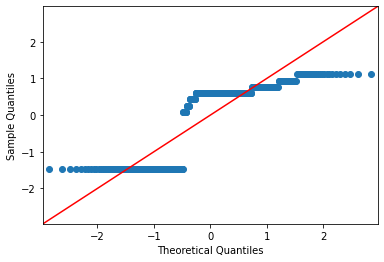

In [19]:
fig = sm.qqplot(seoul, fit=True,line='45')
plt.show()

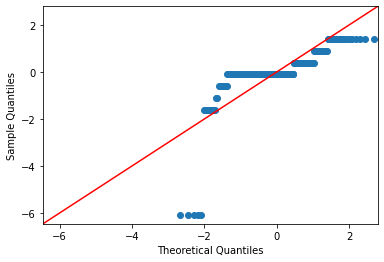

In [20]:
fig = sm.qqplot(juju, fit=True,line='45')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_21124\2932918998.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missin

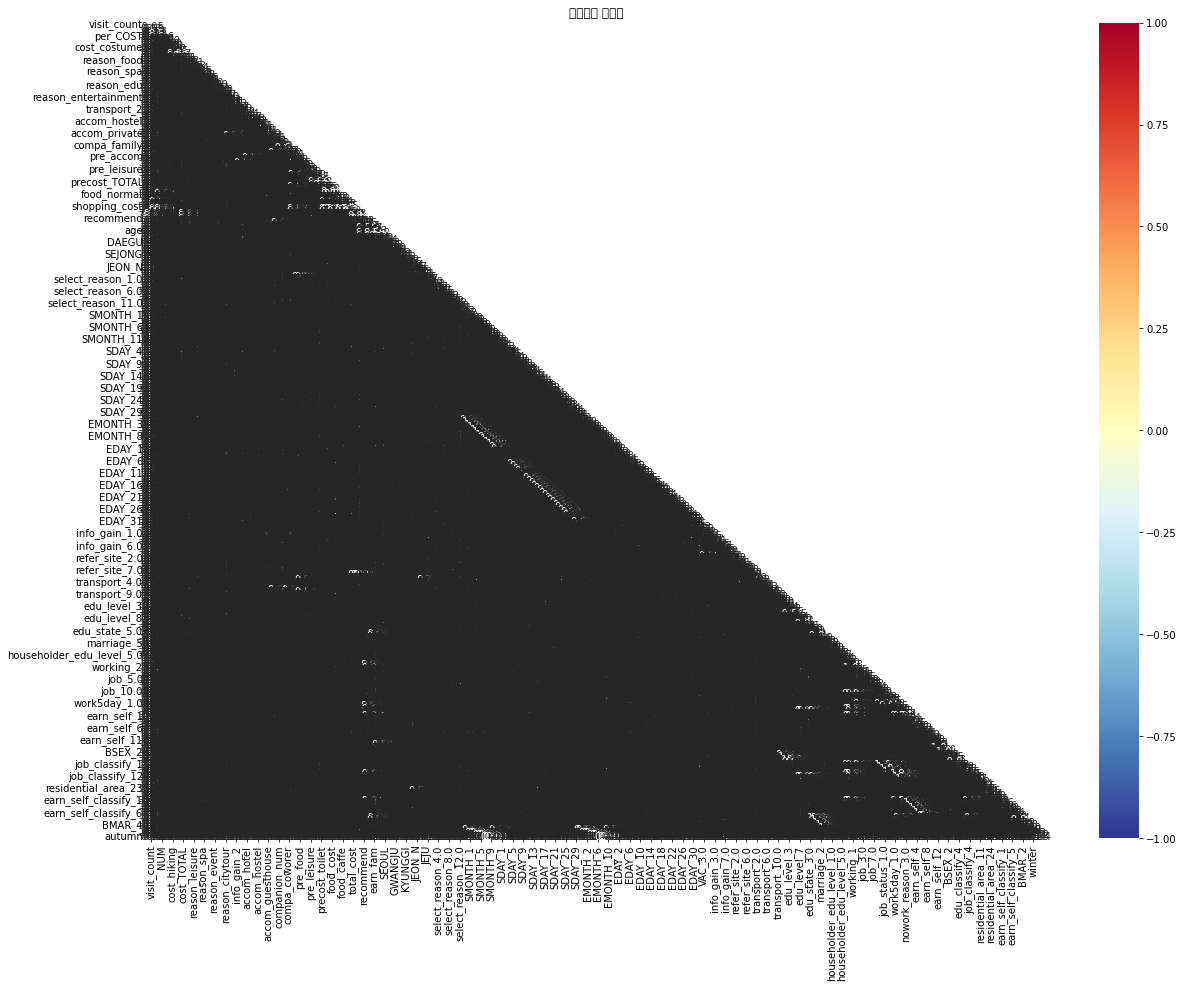

In [27]:
import matplotlib.pyplot as plt    # 모듈 불러오기
### 상관계수 테이블
corr = data.corr()    # 'df'라는 데이터셋을 'corr'라는 이름의 상관계수 테이블로 저장 
### 상관계수 히트맵 그리기
# 히트맵 사이즈 설정
plt.figure(figsize = (20, 15))	
# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
# 히트맵 그리기
sns.heatmap(data = corr,    # 'corr' = 상관계수 테이블
            annot = True,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

In [28]:
data['tot_preference'] = data['Satify']+data['revisit']+data['recommend']
data.drop(['Satify', 'revisit', 'recommend'], axis='columns')
data

,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,cost_fishing,...,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn,tot_preference
0,4,1,1,100000.0,1,100000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,11.0
1,3,1,1,250000.0,1,250000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,12.0
2,3,1,0,50001.0,3,16667.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,12.0
3,3,1,1,120000.0,1,120000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,12.0
4,2,1,2,350001.0,3,116667.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10498,1,2,1,250000.0,2,125000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0.0
10499,1,2,0,100000.0,1,100000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0.0
10500,1,2,0,150000.0,2,75000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0.0
10501,1,2,2,249999.0,3,83333.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0.0


In [30]:
SEOUL['tot_preference'] = SEOUL['Satify']+SEOUL['revisit']+SEOUL['recommend']
SEOUL.drop(['Satify', 'revisit', 'recommend'], axis='columns')

JEJU['tot_preference'] = JEJU['Satify']+JEJU['revisit']+JEJU['recommend']
JEJU.drop(['Satify', 'revisit', 'recommend'], axis='columns')

C:\Users\User\AppData\Local\Temp\ipykernel_21124\460713604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SEOUL['tot_preference'] = SEOUL['Satify']+SEOUL['revisit']+SEOUL['recommend']
C:\Users\User\AppData\Local\Temp\ipykernel_21124\460713604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JEJU['tot_preference'] = JEJU['Satify']+JEJU['revisit']+JEJU['recommend']


,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,cost_fishing,...,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn,tot_preference
3,3,1,1,120000.0,1,120000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,12.0
17,2,1,2,550000.0,1,550000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,11.0
34,2,1,1,200000.0,2,100000.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,12.0
48,2,1,3,400000.0,1,400000.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,11.0
58,2,1,1,1400000.0,4,350000.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9397,1,2,1,500000.0,2,250000.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0.0
10133,1,2,2,890001.0,3,296667.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0.0
10234,1,2,0,120000.0,2,60000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0.0
10270,1,2,2,600000.0,1,600000.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0.0


In [32]:
pd.set_option('display.max_rows', None)
data.corr(method='pearson')[['tot_preference']].sort_values('tot_preference', ascending=False)

,tot_preference
tot_preference,1.000000
revisit,0.985502
recommend,0.985465
Satify,0.984952
transport_1.0,0.580998
reason_nature,0.534234
pre_no,0.382008
total_per_cost,0.377204
reason_rest,0.375762
food_normal,0.365833


In [33]:
SEOUL.corr(method='pearson')[['tot_preference']].sort_values('tot_preference', ascending=False)

,tot_preference
tot_preference,1.000000
recommend,0.993839
revisit,0.993408
Satify,0.993223
total_per_cost,0.545308
pre_no,0.521590
reason_nature,0.507758
total_cost,0.506882
transp_cost,0.488227
compa_friend,0.479835


In [37]:
JEJU.corr(method='pearson')[['tot_preference']].sort_values('tot_preference', ascending=False)

,tot_preference
tot_preference,1.000000
recommend,0.945280
Satify,0.936639
revisit,0.928570
pre_transport,0.827059
reason_nature,0.308073
total_per_cost,0.293273
pre_rentcar,0.281747
pre_accom,0.266606
transport_2,0.219656


In [60]:
data_set = data[['ID','SMONTH_1','SMONTH_2','SMONTH_3','SMONTH_4','SMONTH_5','SMONTH_6','SMONTH_7','SMONTH_8','SMONTH_9','SMONTH_10','SMONTH_11','SMONTH_12']]

In [85]:
data_set = data[["ID","stay","JEJU","KYUNG_S","KYUNG_N","JEON_S","JEON_N","CHOONG_S","CHOONG_N","GANGWON","KYUNGGI","SEJONG","ULSAN","DAEJEON","GWANGJU",
"INCHEON","DAEGU","BUSAN","SEOUL","total_cost", "accom_cost","food_cost","transp_cost","activity_cost","shopping_cost","select_reason_2",
            "Satify","revisit","recommend","BSEX_1","age","fam_num","earn_fam",'spring','summer','autumn','winter']]                       

In [86]:
data_set.head(10)

,ID,stay,JEJU,KYUNG_S,KYUNG_N,JEON_S,JEON_N,CHOONG_S,CHOONG_N,GANGWON,...,revisit,recommend,BSEX_1,age,fam_num,earn_fam,spring,summer,autumn,winter
0,22020520011_1229732,1,0,0,3,0,1,0,0,0,...,4.0,3.0,0,4,3,8,0,1,0,0
1,11090711981_1129310,1,0,0,0,0,0,0,0,1,...,4.0,4.0,0,6,4,6,1,0,0,0
2,2503073057A_1070957,0,0,0,0,0,1,2,0,0,...,4.0,4.0,0,2,3,6,1,0,0,0
3,26030550451_1334180,1,1,1,0,0,0,0,0,0,...,4.0,4.0,1,5,4,5,0,0,1,0
4,11080630451_1223531,2,0,0,0,1,0,0,0,1,...,4.0,3.0,1,4,3,6,0,1,0,0
5,11080651401_1284842,0,0,0,0,0,0,0,0,0,...,4.0,4.0,1,6,2,6,0,0,1,0
6,11080770141_1000667,0,0,0,0,0,0,0,0,0,...,4.0,4.0,0,4,4,6,0,0,0,1
7,11080810811_1059614,0,0,0,0,0,0,0,1,0,...,3.0,4.0,1,5,4,8,1,0,0,0
8,1108084201A_1000674,1,0,0,0,0,0,0,0,2,...,4.0,4.0,1,3,3,7,0,0,0,1
9,1109064137A_1127756,0,0,0,0,0,0,0,0,0,...,4.0,4.0,1,5,4,6,1,0,0,0


In [82]:
data_set.info('ID')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10503 non-null  object 
 1   stay             10503 non-null  int64  
 2   JEJU             10503 non-null  int32  
 3   KYUNG_S          10503 non-null  int32  
 4   KYUNG_N          10503 non-null  int32  
 5   JEON_S           10503 non-null  int32  
 6   JEON_N           10503 non-null  int32  
 7   CHOONG_S         10503 non-null  int32  
 8   CHOONG_N         10503 non-null  int32  
 9   GANGWON          10503 non-null  int32  
 10  KYUNGGI          10503 non-null  int32  
 11  SEJONG           10503 non-null  int32  
 12  ULSAN            10503 non-null  int32  
 13  DAEJEON          10503 non-null  int32  
 14  GWANGJU          10503 non-null  int32  
 15  INCHEON          10503 non-null  int32  
 16  DAEGU            10503 non-null  int32  
 17  BUSAN       

In [87]:
data_set.shape

(10503, 37)

C:\Users\User\AppData\Local\Temp\ipykernel_21124\3187626923.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missin

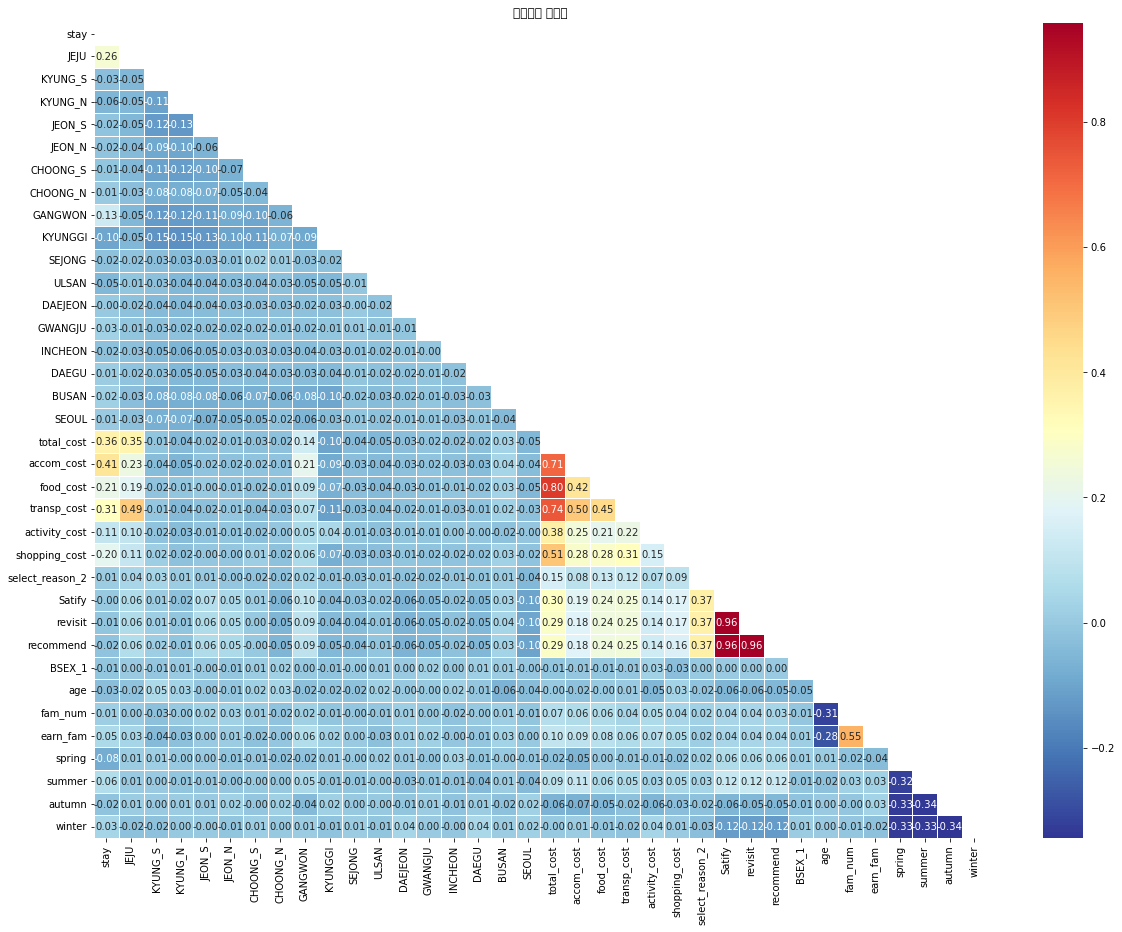

In [88]:
import matplotlib.pyplot as plt    # 모듈 불러오기
### 상관계수 테이블
corr = data_set.corr()    # 'df'라는 데이터셋을 'corr'라는 이름의 상관계수 테이블로 저장 
### 상관계수 히트맵 그리기
# 히트맵 사이즈 설정
plt.figure(figsize = (20, 15))	
# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
# 히트맵 그리기
sns.heatmap(data = corr,    # 'corr' = 상관계수 테이블
            annot = True,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('상관계수 히트맵')
plt.show()

In [90]:
data_set1 = data_set.rename(columns={"ID":"ID","stay":"여행일수","JEJU":"제주","KYUNG_S":"경남","KYUNG_N":"경북","JEON_S":"전남","JEON_N":"전북","CHOONG_S":"충남","CHOONG_N":"충북","GANGWON":"강원","KYUNGGI":"경기","SEJONG":"세종","ULSAN":"울산","DAEJEON":"대전","GWANGJU":"광주",
"INCHEON":"인천","DAEGU":"대구","BUSAN":"부산","SEOUL":"서울","total_cost":"여행 총 경비","accom_cost":"숙박비","food_cost":"식사비","transp_cost":"교통비","activity_cost":"활동비","shopping_cost":"쇼핑비","select_reason_2":"여행지 선택이유",
            "Satify":"만족도","revisit":"재방문 의도","recommend":"타인 추천 의도","BSEX_1":"성별","age":"연령","fam_num":"가구원수","earn_fam":"가구 월소득","spring":"봄","summer":"여름","autumn":"가을","winter":"겨울"}) 

In [91]:
data_set1.head()

,ID,여행일수,제주,경남,경북,전남,전북,충남,충북,강원,...,재방문 의도,타인 추천 의도,성별,연령,가구원수,가구 월소득,봄,여름,가을,겨울
0,22020520011_1229732,1,0,0,3,0,1,0,0,0,...,4.0,3.0,0,4,3,8,0,1,0,0
1,11090711981_1129310,1,0,0,0,0,0,0,0,1,...,4.0,4.0,0,6,4,6,1,0,0,0
2,2503073057A_1070957,0,0,0,0,0,1,2,0,0,...,4.0,4.0,0,2,3,6,1,0,0,0
3,26030550451_1334180,1,1,1,0,0,0,0,0,0,...,4.0,4.0,1,5,4,5,0,0,1,0
4,11080630451_1223531,2,0,0,0,1,0,0,0,1,...,4.0,3.0,1,4,3,6,0,1,0,0


In [94]:
data_set1.shape

(10503, 37)

In [95]:
data_set1.info('ID')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        10503 non-null  object 
 1   여행일수      10503 non-null  int64  
 2   제주        10503 non-null  int32  
 3   경남        10503 non-null  int32  
 4   경북        10503 non-null  int32  
 5   전남        10503 non-null  int32  
 6   전북        10503 non-null  int32  
 7   충남        10503 non-null  int32  
 8   충북        10503 non-null  int32  
 9   강원        10503 non-null  int32  
 10  경기        10503 non-null  int32  
 11  세종        10503 non-null  int32  
 12  울산        10503 non-null  int32  
 13  대전        10503 non-null  int32  
 14  광주        10503 non-null  int32  
 15  인천        10503 non-null  int32  
 16  대구        10503 non-null  int32  
 17  부산        10503 non-null  int32  
 18  서울        10503 non-null  int32  
 19  여행 총 경비   10503 non-null  float64
 20  숙박비       10503 non-null  fl

In [98]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic'

C:\Users\User\AppData\Local\Temp\ipykernel_21124\3249331310.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)
C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


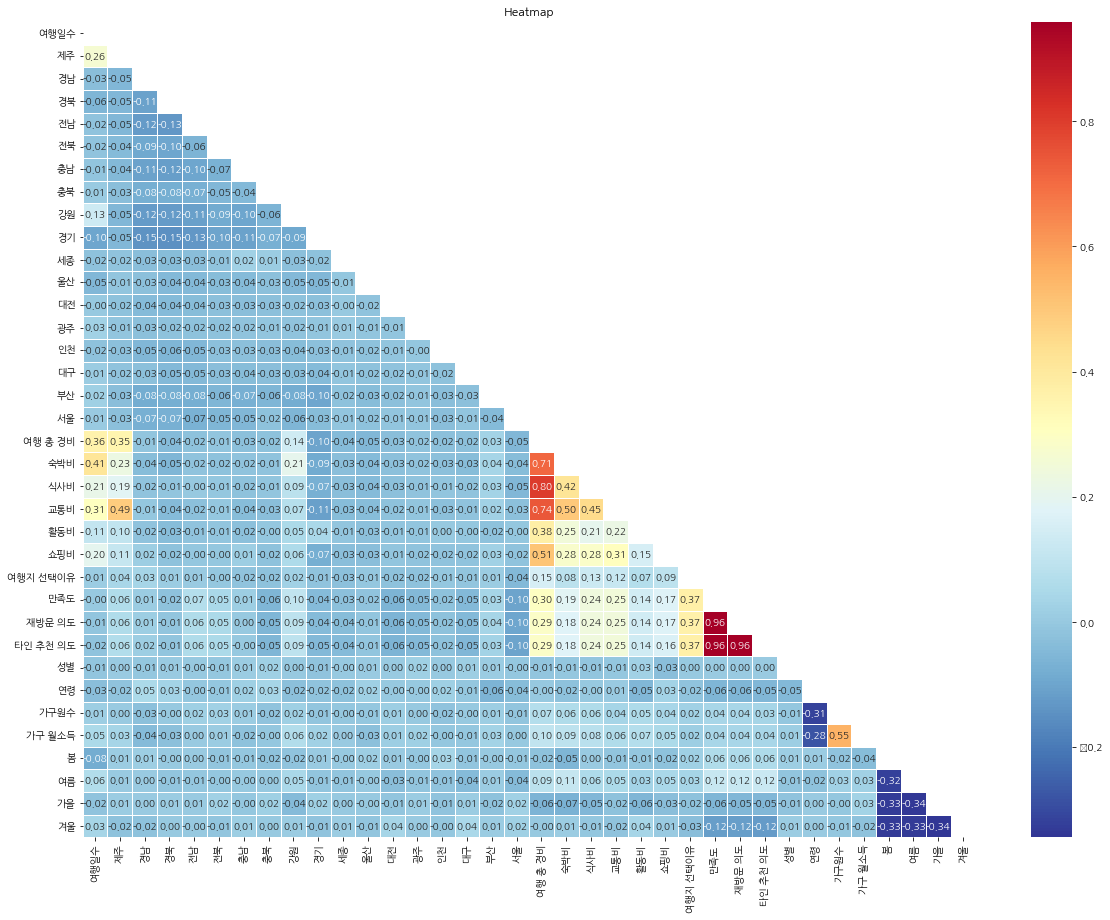

In [99]:
import matplotlib.pyplot as plt    # 모듈 불러오기
### 상관계수 테이블
corr = data_set1.corr()    # 'df'라는 데이터셋을 'corr'라는 이름의 상관계수 테이블로 저장 
### 상관계수 히트맵 그리기
# 히트맵 사이즈 설정
plt.figure(figsize = (20, 15))	
# 히트맵 형태 정의. 여기서는 삼각형 형태(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True
# 히트맵 그리기
sns.heatmap(data = corr,    # 'corr' = 상관계수 테이블
            annot = True,  # 히트맵에 값 표시
            mask=mask,   # 히트맵 형태. 여기서는 위에서 정의한 삼각형 형태
            fmt = '.2f',   # 값 표시 방식. 소숫점 2번째자리까지 
            linewidths = 1.,  # 경계면 실선 구분 여부
            cmap = 'RdYlBu_r')  # 사용할 색 지정 ('python colormap 검색')
plt.title('Heatmap')
plt.show()